In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [391]:
data = pd.read_csv('data_flats.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [393]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

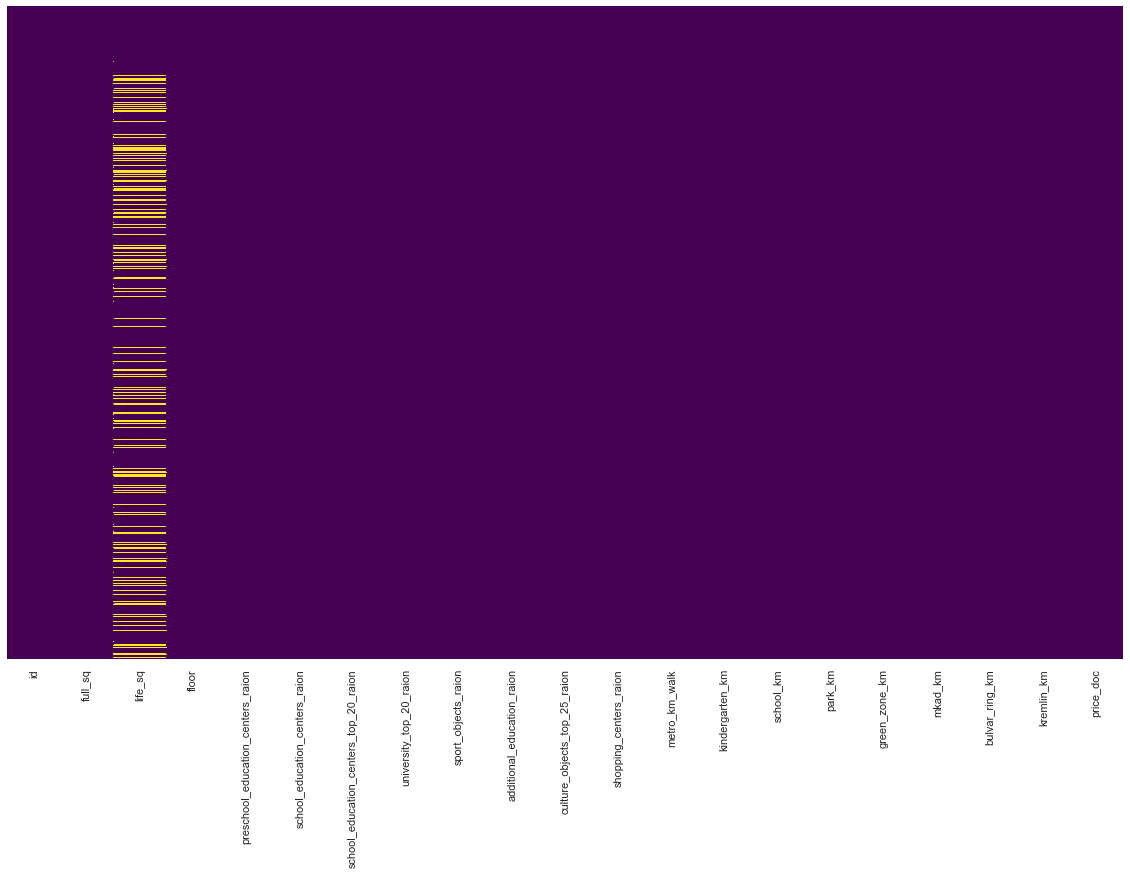

In [394]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

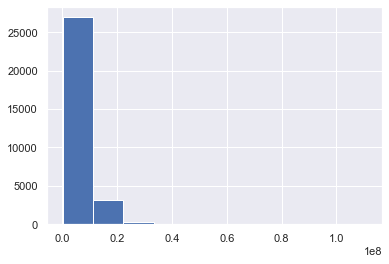

In [395]:
data.price_doc.hist();


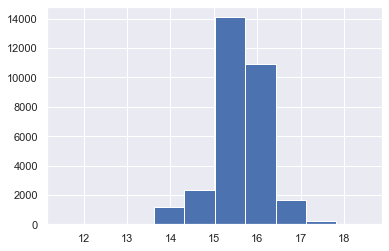

In [396]:
prices_original = data.iloc[:,-1].values
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

<AxesSubplot:>

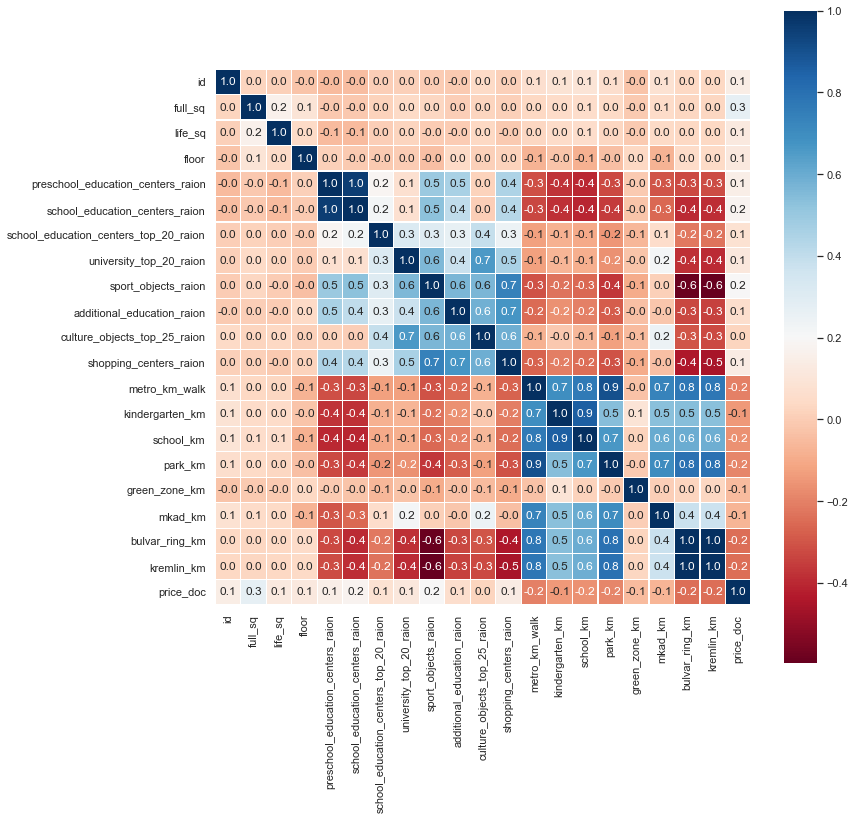

In [397]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [398]:
data2 = data.drop(['id',
                   'preschool_education_centers_raion',
                   'park_km',
                   'kindergarten_km',
                   'kremlin_km',
                   'life_sq',
                   ], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   full_sq                                30469 non-null  int64  
 1   floor                                  30302 non-null  float64
 2   school_education_centers_raion         30469 non-null  int64  
 3   school_education_centers_top_20_raion  30469 non-null  int64  
 4   university_top_20_raion                30469 non-null  int64  
 5   sport_objects_raion                    30469 non-null  int64  
 6   additional_education_raion             30469 non-null  int64  
 7   culture_objects_top_25_raion           30469 non-null  int64  
 8   shopping_centers_raion                 30469 non-null  int64  
 9   metro_km_walk                          30444 non-null  float64
 10  school_km                              30469 non-null  float64
 11  gr

In [399]:
data2.dropna(axis=0, inplace=True)
data2.info()
data2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30277 entries, 0 to 30468
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   full_sq                                30277 non-null  int64  
 1   floor                                  30277 non-null  float64
 2   school_education_centers_raion         30277 non-null  int64  
 3   school_education_centers_top_20_raion  30277 non-null  int64  
 4   university_top_20_raion                30277 non-null  int64  
 5   sport_objects_raion                    30277 non-null  int64  
 6   additional_education_raion             30277 non-null  int64  
 7   culture_objects_top_25_raion           30277 non-null  int64  
 8   shopping_centers_raion                 30277 non-null  int64  
 9   metro_km_walk                          30277 non-null  float64
 10  school_km                              30277 non-null  float64
 11  gr

full_sq                                  0
floor                                    0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25_raion             0
shopping_centers_raion                   0
metro_km_walk                            0
school_km                                0
green_zone_km                            0
mkad_km                                  0
bulvar_ring_km                           0
price_doc                                0
dtype: int64

In [400]:
from sklearn.model_selection import train_test_split

print(data2.info())

prices = data2.iloc[:,-1].values
variables = data2.iloc[:,:-1].values

variables_train, variables_test, prices_train, prices_test = train_test_split(variables,
                                                                              prices,
                                                                              test_size=0.2,
                                                                              random_state=77)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30277 entries, 0 to 30468
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   full_sq                                30277 non-null  int64  
 1   floor                                  30277 non-null  float64
 2   school_education_centers_raion         30277 non-null  int64  
 3   school_education_centers_top_20_raion  30277 non-null  int64  
 4   university_top_20_raion                30277 non-null  int64  
 5   sport_objects_raion                    30277 non-null  int64  
 6   additional_education_raion             30277 non-null  int64  
 7   culture_objects_top_25_raion           30277 non-null  int64  
 8   shopping_centers_raion                 30277 non-null  int64  
 9   metro_km_walk                          30277 non-null  float64
 10  school_km                              30277 non-null  float64
 11  gr

In [401]:
from sklearn.preprocessing import RobustScaler

transformer_a = RobustScaler().fit(variables_train)
variables_train_norm = transformer_a.transform(variables_train)

transformer_b = RobustScaler().fit(variables_test)
variables_test_norm = transformer_b.transform(variables_test)

In [402]:
from sklearn.linear_model import LinearRegression

myModel = LinearRegression()
myModel.fit(variables_train_norm,prices_train)

price_pred = myModel.predict(variables_test_norm)

In [403]:
from sklearn import metrics

MSE = metrics.mean_squared_error(np.exp(prices_test), np.exp(price_pred))
print(f'MSE: {MSE}')

R_2 = metrics.r2_score(np.exp(prices_test), np.exp(price_pred))
print(f'R_2: {round(R_2,3)}')


MSE: 16647931507746.965
R_2: 0.231
